In [9]:
# The code was removed by Watson Studio for sharing.

In [11]:
df_data_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df_data_1.drop(columns=['Loan_ID'],inplace=True)

In [16]:
df_data_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:
df_data_1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df_data_1['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [28]:
df_data_1['Credit_History'].unique()

array([ 1.,  0., nan])

In [42]:
cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Amount_Term','Credit_History']
# for i,col in enumerate(cat_cols):
#     print(col)
cat_cols[0]

'Gender'

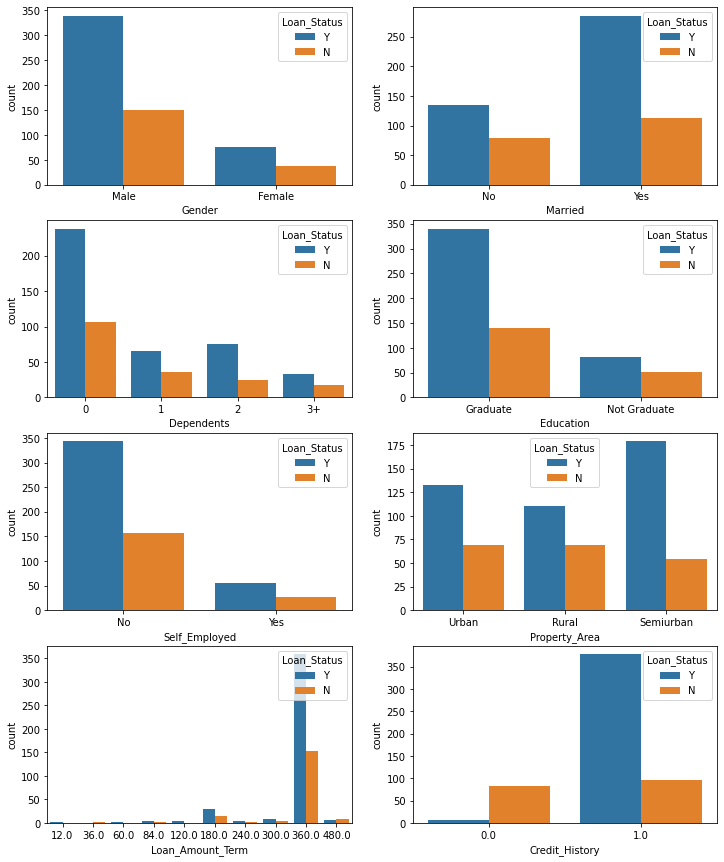

In [56]:
import seaborn as sns
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cols in enumerate(cat_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cols,data=df_data_1,hue='Loan_Status',ax=axes[row,col])

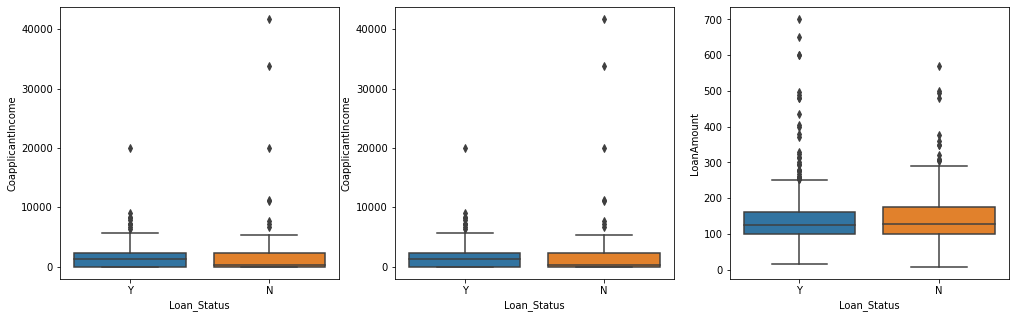

In [72]:
num_col=['CoapplicantIncome','CoapplicantIncome','LoanAmount']
fig,axes=plt.subplots(1,3,figsize=(17,5))
for idx,cols in enumerate(num_col):
    sns.boxplot(data=df_data_1,x='Loan_Status',y=cols,ax=axes[idx])

 the numerical columns are not much corelated with the loan status

In [73]:
df_data_encoded=pd.get_dummies(df_data_1,drop_first=True)
df_data_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [75]:
y=df_data_encoded['Loan_Status_Y']
X=df_data_encoded.drop(columns='Loan_Status_Y')

In [76]:
print(X)
y

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0               1.0            1            0 

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [82]:
from sklearn.model_selection import train_test_split
train_X,test_x,train_y,test_y=train_test_split(X,y,train_size=0.7,stratify=y,random_state=10)

In [98]:
print(train_y.value_counts())
test_y.value_counts()

1    295
0    134
Name: Loan_Status_Y, dtype: int64


1    127
0     58
Name: Loan_Status_Y, dtype: int64

In [108]:
train_X.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 14
Loan_Amount_Term           10
Credit_History             33
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [109]:
print(train_X['Loan_Amount_Term'].value_counts())
train_X['Credit_History'].value_counts()

360.0    357
180.0     33
480.0     11
300.0      6
84.0       4
240.0      3
120.0      3
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64


1.0    334
0.0     62
Name: Credit_History, dtype: int64

In [125]:
test_x_imp=test_x.copy()

In [127]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
imp_train=imp.fit(train_X[['Loan_Amount_Term','Credit_History']])
train_X[['Loan_Amount_Term','Credit_History']]=imp_train.transform(train_X[['Loan_Amount_Term','Credit_History']])
test_x_imp[['Loan_Amount_Term','Credit_History']]=imp_train.transform(test_x[['Loan_Amount_Term','Credit_History']])
imp_1=SimpleImputer(strategy='mean')
imp_1_train=imp_1.fit(train_X[['LoanAmount']])
train_X[['LoanAmount']]=imp_1_train.transform(train_X[['LoanAmount']])
test_x_imp[['LoanAmount']]=imp_1_train.transform(test_x[['LoanAmount']])

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [123]:
train_X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64